In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def disp(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

In [3]:
sep_coin = cv2.imread('../image/pennies.jpg')

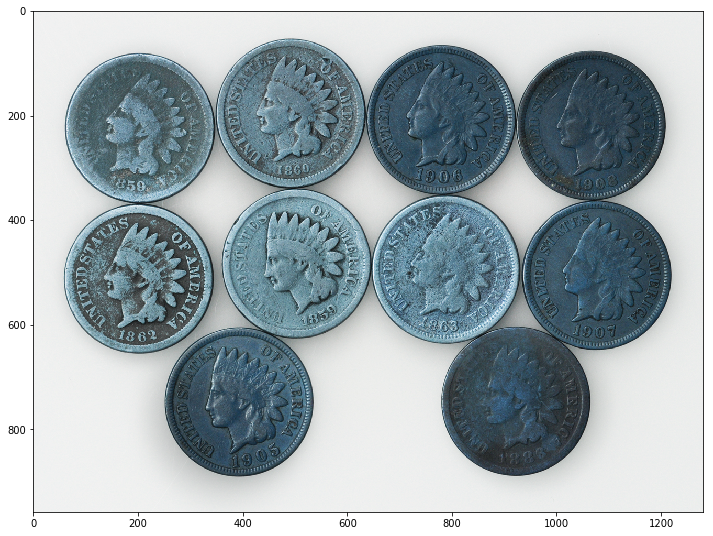

In [4]:
disp(sep_coin)

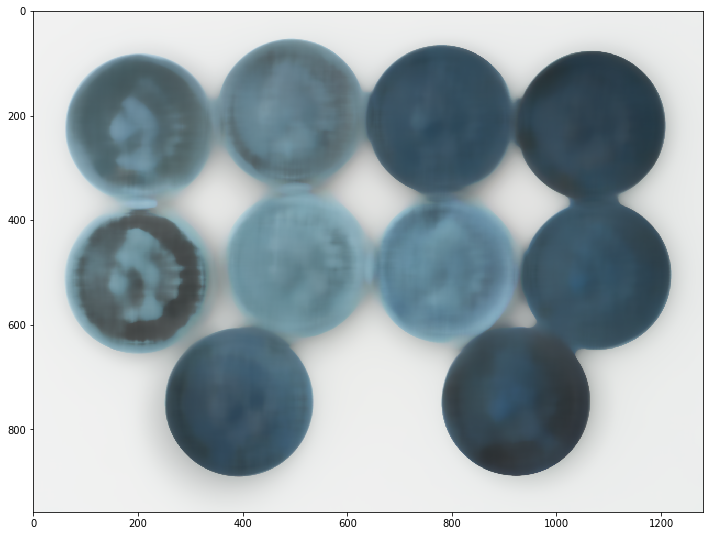

In [5]:
sep_blur = cv2.medianBlur(sep_coin, 35)
disp(sep_blur)

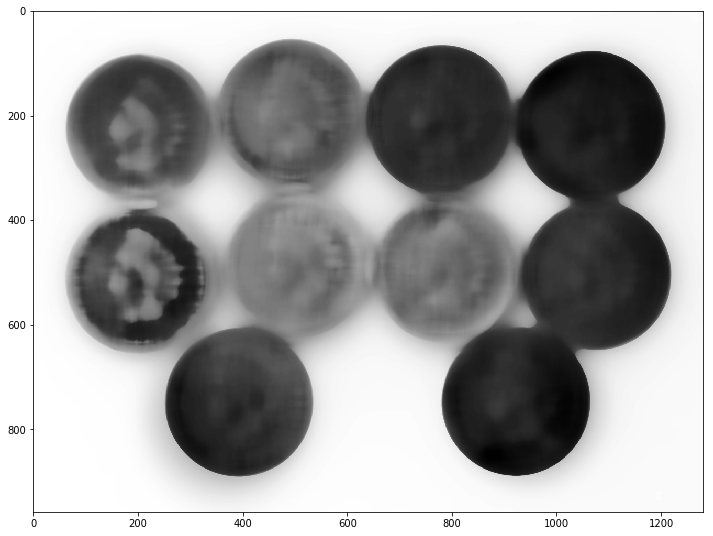

In [6]:
sep_gray = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)
disp(sep_gray)

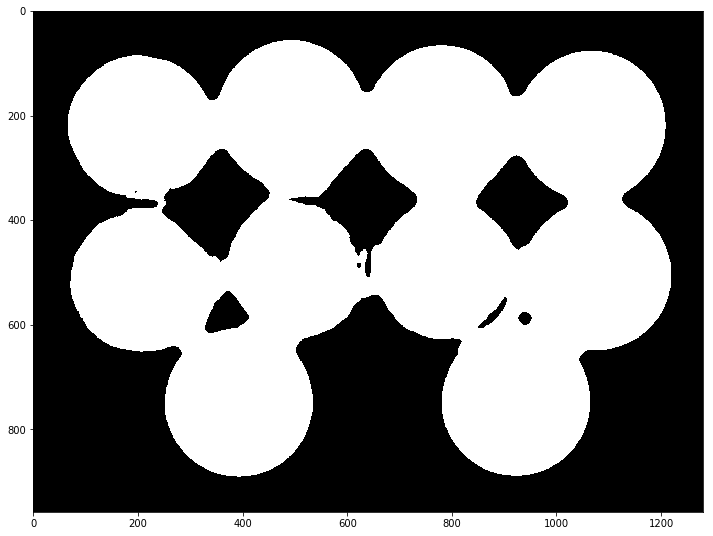

In [7]:
ret, sep_th = cv2.threshold(sep_gray, 127, 255, 
                            cv2.THRESH_BINARY_INV+ cv2.THRESH_OTSU) # + cv2.THRESH_OTSU
disp(sep_th)

In [8]:
# NOISE REMOVAL

In [9]:
kernel = np.ones((3,3), np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

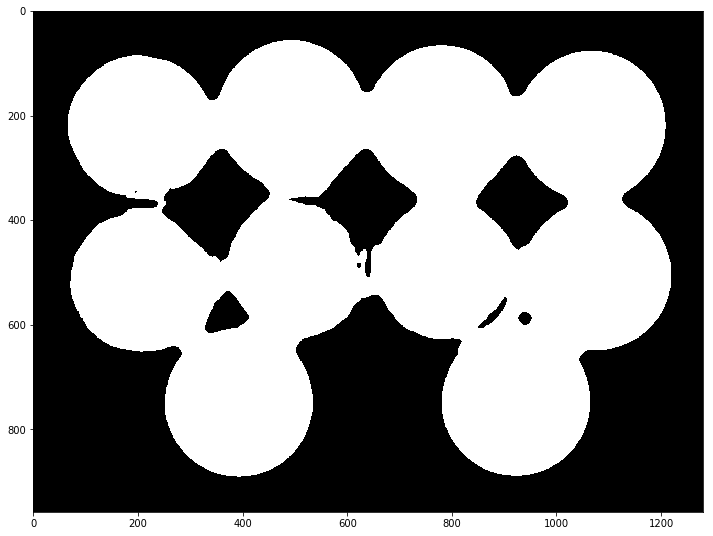

In [10]:
opening = cv2.morphologyEx(sep_th, cv2.MORPH_OPEN, kernel, iterations=2)
disp(opening)

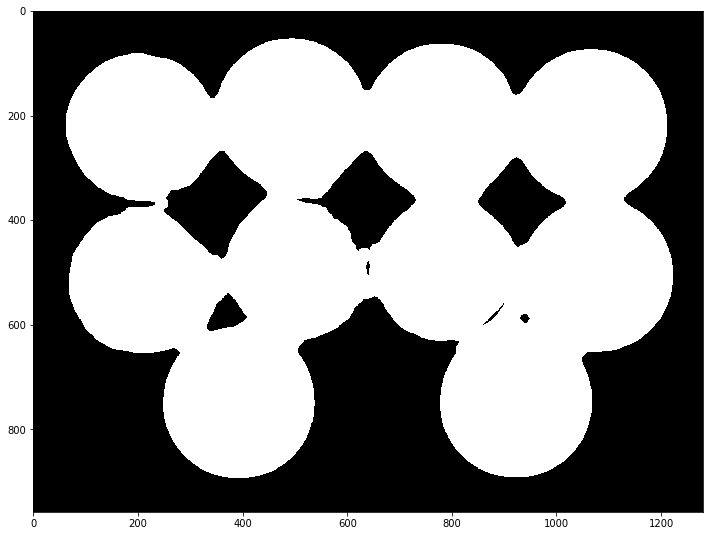

In [11]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)
disp(sure_bg)

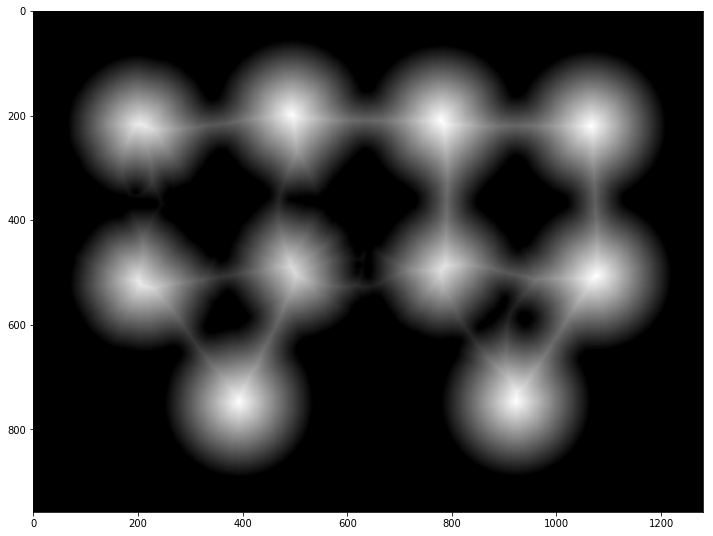

In [12]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
disp(dist_transform)

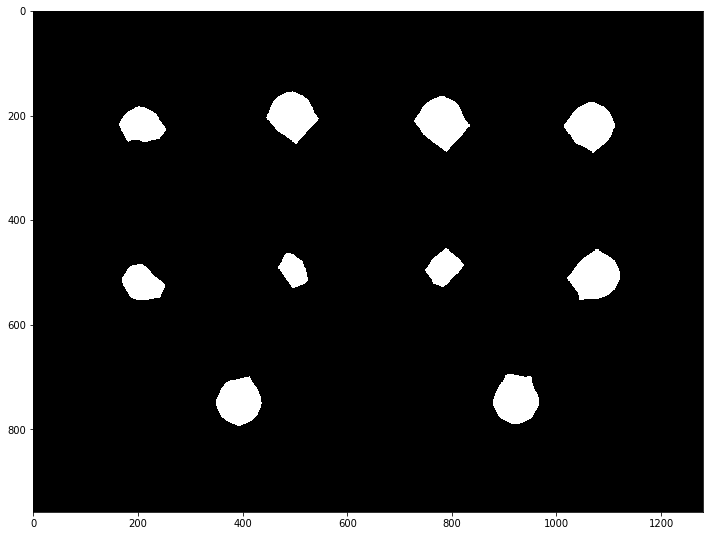

In [13]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
disp(sure_fg)

In [14]:
sure_fg = np.uint8(sure_fg)

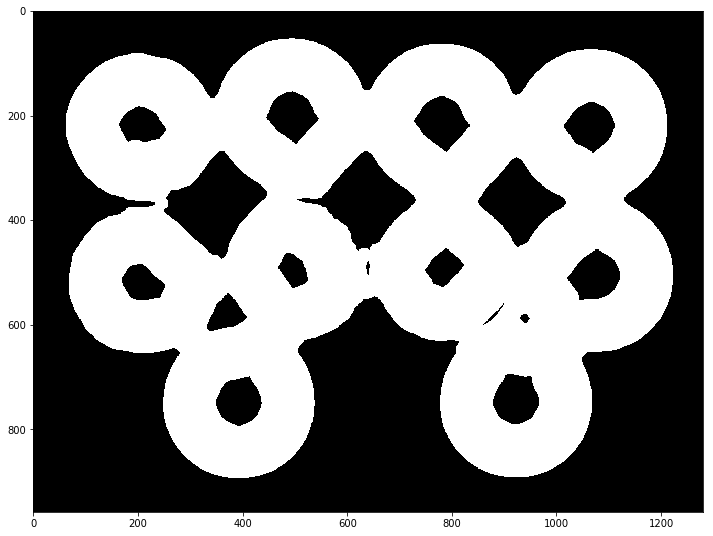

In [15]:
unknown = cv2.subtract(sure_bg, sure_fg)
disp(unknown)

In [16]:
ret, markers = cv2.connectedComponents(sure_fg)

In [17]:
markers

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [18]:
markers = markers + 1

In [19]:
markers[unknown == 255] = 0

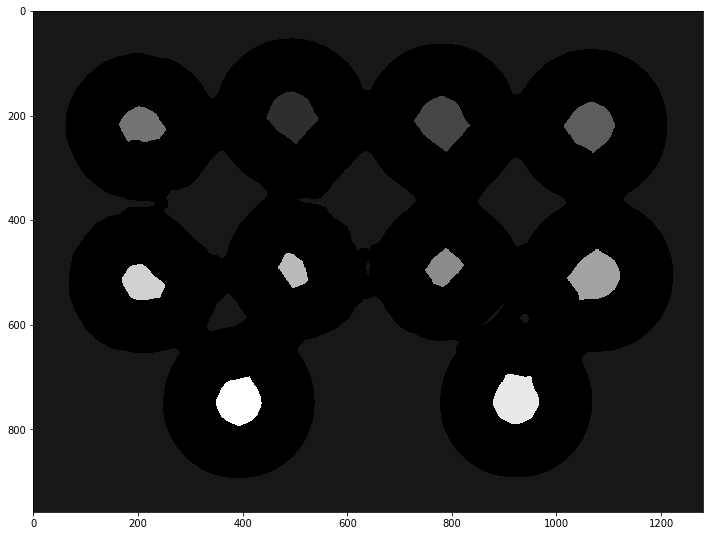

In [20]:
disp(markers)

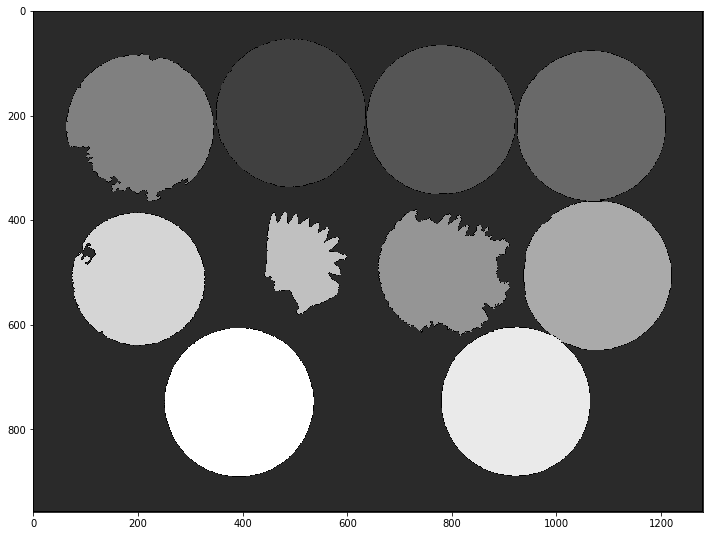

In [21]:
markers = cv2.watershed(sep_coin, markers)
disp(markers)

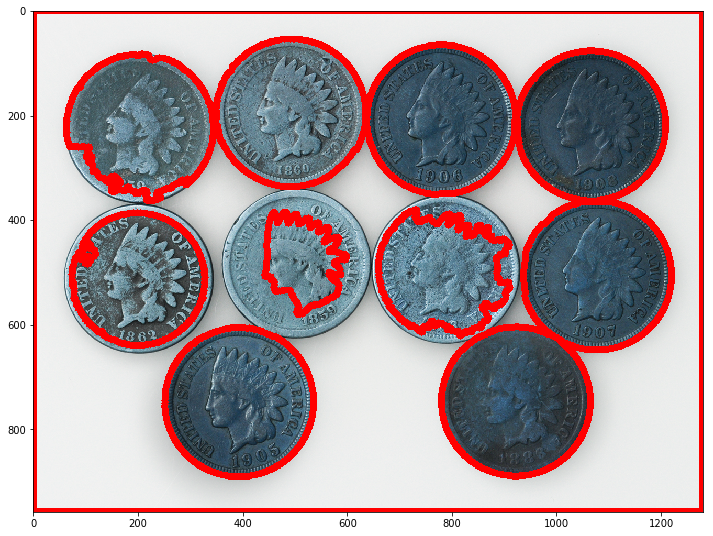

In [22]:
img, contours, hierachy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

sep_coin_copy = sep_coin.copy()

for i in range(len(contours)):
    if hierachy[0][i][3] == -1:
        cv2.drawContours(sep_coin_copy, contours, i, (255,0,0), 10)
        
disp(sep_coin_copy)

In [23]:
len(contours)

19